<a href="https://colab.research.google.com/github/MihretDe/ComputerVisionLearningPath/blob/main/YOLO_Object_Counter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics --quiet
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

print("YOLO installed successfully!")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLO installed successfully!


In [2]:
model = YOLO("yolov8n.pt")


In [6]:
from google.colab import files
uploaded = files.upload()
image_paths = list(uploaded.keys())
print("Uploaded images:", image_paths)


Saving 5.jpg to 5.jpg
Uploaded images: ['5.jpg']


In [5]:
TARGET_CLASSES = [0, 2]   # 0=person, 2=car

def count_objects(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = model(img_rgb)[0]

    people_count = 0
    car_count = 0

    for box in results.boxes:
        cls_id = int(box.cls[0])
        if cls_id not in TARGET_CLASSES:
            continue

        x1, y1, x2, y2 = map(int, box.xyxy[0])
        label = model.names[cls_id]

        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255,0,0), 2)
        cv2.putText(img_rgb, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,0), 2)

        if cls_id == 0:
            people_count += 1
        elif cls_id == 2:
            car_count += 1

    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()

    print("People:", people_count)
    print("Cars:", car_count)



----- Processing: 5.jpg -----

0: 448x640 1 person, 7 cars, 364.5ms
Speed: 12.9ms preprocess, 364.5ms inference, 35.2ms postprocess per image at shape (1, 3, 448, 640)


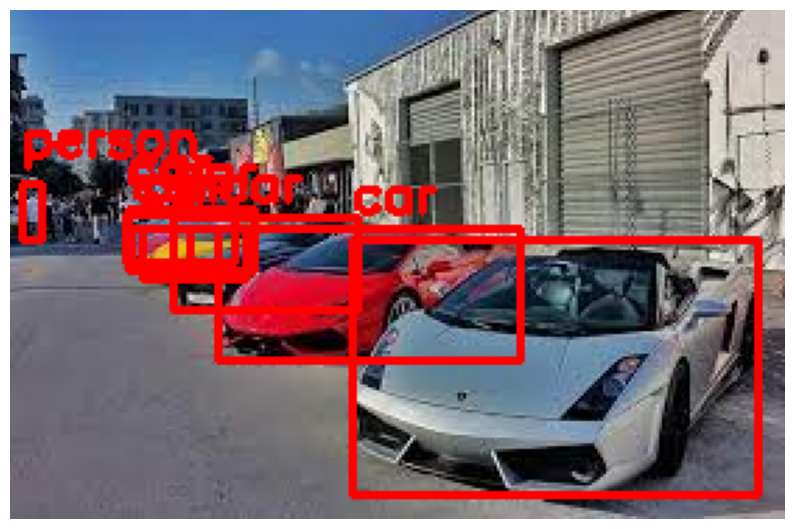

People: 1
Cars: 7


In [7]:
for img_path in image_paths:
    print("\n----- Processing:", img_path, "-----")
    count_objects(img_path)

